In [1]:
DEBUG = False #Change this to "True" to see the output at every stage

In [2]:
# Importing the important libraries
import numpy as np #For array operations
from PIL import Image #For reading images
import matplotlib.pyplot as plt #For plotting

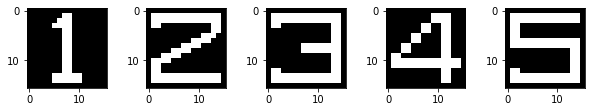

In [3]:
# Saving Images that are used to train the model in the form of arrays
num_images = 5; #Number of training images
size_max_dimension_size = 16

image = np.zeros(num_images*size_max_dimension_size*size_max_dimension_size).reshape(num_images, size_max_dimension_size, size_max_dimension_size)
img = Image.open('1.png')
image[0] = np.array(img)
img = Image.open('2.png')
image[1] = np.array(img)
img = Image.open('3.png')
image[2] = np.array(img)
img = Image.open('4.png')
image[3] = np.array(img)
img = Image.open('5.png')
image[4] = np.array(img)

plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.5)
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(image[i], cmap='gray', vmin=0, vmax=255)

# Normalizing the array values to have values either 0 or 1
for i in range(num_images):
    image[i]=image[i]/255;

In [4]:
# Filters and their general Parameters
zero_padding_size = 1 #zero-padding size, putting zero means no padding is being done
pooling_size = 2 #max pooling is defined here
num_filters = 6 #number of filters that are used

filterk = np.zeros((num_filters,3,3))
filterk[0] = np.array([[
    [-1, 2, -1],   
    [-1, 2, -1],   
    [-1, 2, -1]
]])  
filterk[1] = np.array([[
    [-1, -1, -1],   
    [ 2,  2,  2],   
    [-1, -1, -1]
]])
filterk[2] = np.array([[
    [ 2, -1, -1],   
    [-1,  2, -1],   
    [-1, -1,  2]
]])
filterk[3] = np.array([[
    [-1, -1,  2],   
    [-1,  2, -1],   
    [ 2, -1, -1]
]])
filterk[4] = np.array([[
    [-1,  2, -1],   
    [ 2,  2,  2],   
    [-1,  2, -1]
]])
filterk[5] = np.array([[
    [-1, -1,  2],   
    [ 2,  2,  2],   
    [-1, -1,  2]
]])

#### Defining functions to implement CNN

In [5]:
#Padding function (Step 1 - Extracting the features of Image using Convolutional Neural Network)
def padding(image, size):
    top_bot_pad = np.zeros(image.shape[1] * size).reshape(size ,image.shape[1]) #it gets the image width size and generate 1D array with size = width of image
    padded_image_intail = np.zeros((image.shape[1] + (2*size)) * image.shape[0]).reshape(image.shape[1] + (2*size), image.shape[0]) #creating a 2D array of same width but height = 2*size of padding + image original height
    padded_image_intail = np.concatenate((np.concatenate((top_bot_pad, image), axis=0),top_bot_pad), axis=0) #Adding zeros on top and bottom
    padded_image = np.zeros((image.shape[1] + (2*size)) * (image.shape[0] + (2*size))).reshape((image.shape[1] + (2*size)), (image.shape[0] + (2*size))) #creating a 2D array of changed height with width = 2*size of padding + image original width
    side_pad = np.zeros(padded_image_intail.shape[0] * size).reshape(padded_image_intail.shape[0], size) #it gets the changed image height size and generate 1D array with size = changed height of image
    padded_image = np.concatenate((np.concatenate((side_pad, padded_image_intail), axis=1),side_pad), axis=1) ##Adding zeros on top and bottom
    if (DEBUG == True):
        plt.figure(1)
        plt.imshow(padded_image*255, cmap='gray', vmin=0, vmax=255)
        plt.show()
    return padded_image

#Convolve image with filter (Step 2 - Extracting the features of Image using Convolutional Neural Network)
def filtering(image, filterk):
    output = np.zeros((image.shape[0] - (filterk.shape[0]-1), image.shape[1] - (filterk.shape[1]-1))) #creating an array to store convolved image
    f = np.zeros((filterk.shape[0], filterk.shape[1])) #array to convolved data for single pixel temporarily
    #Convolve image with filter pixel by pixel
    for i in range (image.shape[0] - (filterk.shape[0]-1)):
        for j in range (image.shape[1] - (filterk.shape[1]-1)):
            f = image[i:(i+filterk.shape[0]), j:(j+filterk.shape[1])]
            t = filterk * f
            output[i][j] = np.sum(t)
    if (DEBUG == True):
        plt.imshow(output*255, cmap='gray', vmin=0, vmax=255)
        plt.title("filtered output")
        plt.show()
    return output

#Applying  ReLU (Step 3 - Extracting the features of Image using Convolutional Neural Network)
def ReLU(image):
    rectified_data = np.zeros((image.shape[0], image.shape[1])) #creating an array to store rectified data
    for i in range (image.shape[0]):
        for j in range (image.shape[1]):
            rectified_data[i][j] =  np.maximum(image[i][j], 0) #replacing negative values with zero
    if (DEBUG == True):
        plt.imshow(rectified_data*255, cmap='gray', vmin=0, vmax=255)
        plt.title("ReLU output")
        plt.show()
    return rectified_data

#Max Pooling (Step 4 - Extracting the features of Image using Convolutional Neural Network)
def max_pooling(image, pooling_size):
    sampled_out = np.zeros((int(image.shape[0]/pooling_size), int(image.shape[1]/pooling_size))) #creating an array to store pooled/sampled data
    temp_sampled = np.zeros((pooling_size, pooling_size)) #creates an array of desired pooling size i.e. 2x2 in our case
    #selecting the porition of the rectified data
    for i in range (int(image.shape[0]/pooling_size)):
        for j in range (int(image.shape[1]/pooling_size)):
            Max = 0
            #finding the maximum value from the portion of image defined by pooled size
            for k in range (pooling_size):
                for l in range (pooling_size):
                    temp_sampled[k][l]= image[(pooling_size*i)+k][(pooling_size*j)+l]
                    if (Max < temp_sampled[k][l]):
                        Max = temp_sampled[k][l]     
            sampled_out[i][j] = Max #maximum value will be stored
    if (DEBUG == True):
        plt.imshow(sampled_out*255, cmap='gray', vmin=0, vmax=255)
        plt.title("Max Pooling output")
        plt.show()
    return sampled_out

In [6]:
#function to apply all the functions related to feature extraction
def apply_filters(image, zero_padding_size, down_sampling_size):
    if (DEBUG == True):
        print("Image Below is the padded image");
    padded_image = padding(image, zero_padding_size) #calling zero padding function
    if (DEBUG == True):
        print("Feature Extraction images");
    output_images = np.zeros((num_filters,
                    int((image.shape[0] - 2 + (2*zero_padding_size))/down_sampling_size),
                    int((image.shape[1] - 2 + (2*zero_padding_size))/down_sampling_size)
                    )) #creating an array to store output after performing all operations
    for i in range(num_filters):
        output = filtering(padded_image, filterk[i]) #calling filtering/convolution function
        rectified_image = ReLU(output) #calling ReLU function
        sampled_image = max_pooling(rectified_image, down_sampling_size) #calling Max Pooling function
        output_images[i] = sampled_image
    return output_images

In [7]:
# Training the data by applying filters and flatten the data (Step 5 - Extracting the features of Image using Convolutional Neural Network)
X = np.zeros((num_images, apply_filters(image[0], zero_padding_size, pooling_size).size))
for i in range(num_images):
    x = apply_filters(image[i], zero_padding_size, pooling_size)
    X[i] = x.flatten()/4  #flatten the image to feed it to the neural network and divide by 4 is used to normalize the data

### Multilayer Perceptron

In [8]:
# The labels for the training data.
Y = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1]
])

# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# initializing the variables
rate=0.1 # learning rate
input_units = X.shape[1] # number of features in data set
hidden_units = 22 # number of hidden layers neurons
output_units = Y.shape[1] # number of neurons at output layer
error = []
mse =100
iterations = 200000; #maximum number of iteratons can be done

# initializing weights and thetas
np.random.seed(57)
W_hidden = 4*np.random.random((input_units,hidden_units))-2
W_output = 4*np.random.random((hidden_units,output_units))-2
theta_hidden = 4*np.random.random((1,hidden_units))-2
theta_output = 4*np.random.random((1,output_units))-2

def forward_propagation(X, W_hidden, W_output, theta_hidden, theta_output):
    hidden_output = sigmoid(np.dot(X,W_hidden) + theta_hidden) #4x2*2x2+1x2 = 4x2 (performing sum and activation at hidden layer)
    Y_output = sigmoid(np.dot(hidden_output,W_output)+ theta_output) #4x2*2x1+1x1 = 4x1 (performing sum and activation at hidden layer)
    return hidden_output, Y_output

def backpropagation(Y, Y_output, hidden_output, W_hidden, W_output, theta_hidden, theta_output):
    mse = (1/2) * np.sum(np.square(Y - Y_output)) #Mean square Error
    E = Y-Y_output #Error dE/dO 
    error.append(mse)
    
    #Using Chain Rule to find Delta for both Output Weights and Hidden Wieghts
    d_sum_o = (Y_output)*(1-Y_output) # dO_o/dSum_o
    d_sum_h = (hidden_output)*(1-hidden_output) # dO_h/dSum_h
    delta_output = E * d_sum_o #delta_O
    dE_h = np.dot(delta_output, W_output.T) # dE/O_h
    delta_hidden = dE_h * d_sum_h #delta_h
    W_output += np.dot(hidden_output.T, delta_output) *rate #updating Wieghts for Output Layer
    theta_output += np.sum(delta_output, axis=0,keepdims=True) *rate #updating Theta for Output Layer
    W_hidden += np.dot(X.T, delta_hidden) * rate #updating Wieghts for Hidden Layer
    theta_hidden += np.sum(delta_hidden, axis=0,keepdims=True) *rate #updating Theta for Hidden Layer
    return W_hidden, W_output, theta_hidden, theta_output, mse

# training the model
while mse > 0.001 or iterations != 0:
#for i in range(10000):

    #Forward Propogation
    hidden_output, Y_output = forward_propagation(X, W_hidden, W_output, theta_hidden, theta_output)

    #Backpropagation
    W_hidden, W_output, theta_hidden, theta_output, mse = backpropagation(Y, Y_output, hidden_output, W_hidden, W_output, theta_hidden, theta_output)

    iterations -= iterations;


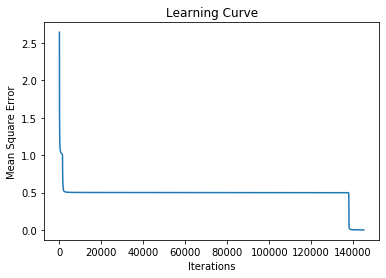

In [9]:
plt.plot(range(len(error)), error)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")
plt.title("Learning Curve")
plt.show()

## Detection of Image (Predicting the number)

In [10]:
#Function to implement the size reduction
def reducting_size(arr_of_image):
    # Cropping the Image to get the image of size ratio 1:1
    if(arr_of_image[:, 0].size < arr_of_image[0, :].size):
        max_size = arr_of_image[:, 0].size
        size_reduction = arr_of_image[0, :].size - max_size
        cropped_arr = arr_of_image[:, int(size_reduction/2): arr_of_image[0, :].size - int(size_reduction/2)]
    else:
        max_size = arr_of_image[0, :].size
        size_reduction = arr_of_image[:, 0].size - max_size
        cropped_arr = arr_of_image[int(size_reduction/2): arr_of_image[0, :].size - int(size_reduction/2), :]

    if (DEBUG == True):
        plt.imshow(cropped_arr, cmap='gray', vmin=0, vmax=255)
        plt.title('Cropped Original Image in GreyScale')
        plt.show()

    reduction_factor = int(cropped_arr.shape[0]/size_max_dimension_size)
    if (DEBUG == True):
        print('Reduction factor for the Image = ' + str(reduction_factor))

    reduced_arr = np.zeros((size_max_dimension_size, size_max_dimension_size))
    for i in range (size_max_dimension_size):
        for j in range (size_max_dimension_size):
            reduced_arr[i][j] = int(np.sum(cropped_arr[i*reduction_factor:(i+1)*reduction_factor, j*reduction_factor:(j+1)*reduction_factor])
            /(reduction_factor*reduction_factor))

    if (DEBUG == True):
        plt.imshow(reduced_arr, cmap='gray', vmin=0, vmax=255)
        plt.title('Size reduced Image in GreyScale')
        plt.show()

    # Converting the Grayscale image into Black and White Image by using Thresholding
    b_w_reduced = np.zeros((size_max_dimension_size, size_max_dimension_size))
    for i in range(size_max_dimension_size):
        for j in range(size_max_dimension_size):
            if (reduced_arr[i][j]<215):
                b_w_reduced[i][j] = 0
            else:
                b_w_reduced[i][j] = 255;

    if b_w_reduced[0][0] != 0:
        for i in range(size_max_dimension_size):
            for j in range(size_max_dimension_size):
                if (b_w_reduced[i][j] == 255):
                    b_w_reduced[i][j] = 0
                else:
                    b_w_reduced[i][j] = 255;

    if (DEBUG == True):
        plt.imshow(b_w_reduced, cmap='gray', vmin=0, vmax=255)
        plt.title('Black and White Image / Image for CNN')
        plt.show()
        print('Shape of Image for CNN operation = ' + str(b_w_reduced.shape))
        
    return b_w_reduced

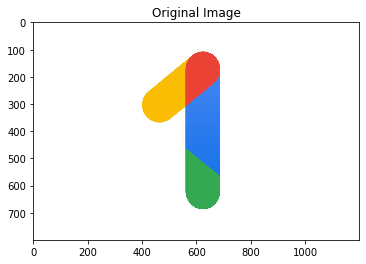

In [11]:
org_img = Image.open('one.jpg')
plt.imshow(org_img)
plt.title('Original Image')
plt.show()

img = org_img.convert('L')
arr_of_image = np.array(img)

if (DEBUG == True):
    plt.imshow(arr_of_image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image in GreyScale')
    plt.show()

    print('Shape of Original Image = ' + str(arr_of_image.shape))

In [12]:
#Reducing the size of image
reduced_image = reducting_size(arr_of_image);

# Normalizing the array values to have values either 0 or 1
test = reduced_image/255;

x = apply_filters(test, zero_padding_size, pooling_size)
test_data = x.flatten()/4 #flatten the image to feed it to the neural network and divide by 4 is used to normalize the data

# Predicting the test data
hidden_test_output, Y_test_output = forward_propagation(test_data, W_hidden, W_output, theta_hidden, theta_output)

num = 1;
Max = Y_test_output[0,0]

for i in range(4):
    if (Max < Y_test_output[0, i+1]):
        Max = Y_test_output[0, i+1]
        num = i+2
        
print('Predicted number = ' + str(num))

Predicted number = 1


## More predicted Images

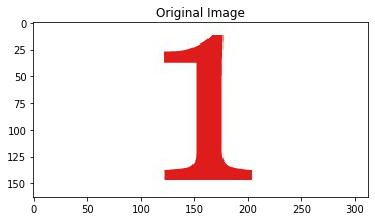


Predicted number = 1


In [13]:
org_img = Image.open('one1.jpg')
plt.imshow(org_img)
plt.title('Original Image')
plt.show()

img = org_img.convert('L')
arr_of_image = np.array(img)

if (DEBUG == True):
    plt.imshow(arr_of_image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image in GreyScale')
    plt.show()

reduced_image = reducting_size(arr_of_image);

# Normalizing the array values to have values either 0 or 1
test = reduced_image/255;

x = apply_filters(test, zero_padding_size, pooling_size)
test_data = x.flatten()/4 #flatten the image to feed it to the neural network and divide by 4 is used to normalize the data

# Predicting the test data
hidden_test_output, Y_test_output = forward_propagation(test_data, W_hidden, W_output, theta_hidden, theta_output)

num = 1;
Max = Y_test_output[0,0]

for i in range(4):
    if (Max < Y_test_output[0, i+1]):
        Max = Y_test_output[0, i+1]
        num = i+2
        
print('\nPredicted number = ' + str(num))

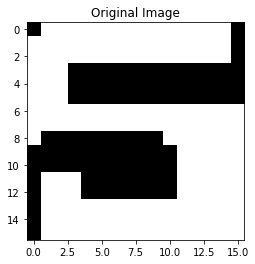


Predicted number = 5


In [14]:
org_img = Image.open('five.png')
plt.imshow(org_img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.show()

img = org_img.convert('L')
arr_of_image = np.array(img)

if (DEBUG == True):
    plt.imshow(arr_of_image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image in GreyScale')
    plt.show()

reduced_image = reducting_size(arr_of_image);

# Normalizing the array values to have values either 0 or 1
test = reduced_image/255;

x = apply_filters(test, zero_padding_size, pooling_size)
test_data = x.flatten()/4 #flatten the image to feed it to the neural network and divide by 4 is used to normalize the data

# Predicting the test data
hidden_test_output, Y_test_output = forward_propagation(test_data, W_hidden, W_output, theta_hidden, theta_output)

num = 1;
Max = Y_test_output[0,0]

for i in range(4):
    if (Max < Y_test_output[0, i+1]):
        Max = Y_test_output[0, i+1]
        num = i+2
        
print('\nPredicted number = ' + str(num))

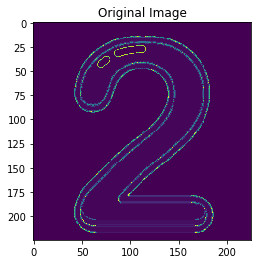


Predicted number = 2


In [15]:
org_img = Image.open('two.png')
plt.imshow(org_img)
plt.title('Original Image')
plt.show()

img = org_img.convert('L')
arr_of_image = np.array(img)

if (DEBUG == True):
    plt.imshow(arr_of_image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image in GreyScale')
    plt.show()

reduced_image = reducting_size(arr_of_image);

# Normalizing the array values to have values either 0 or 1
test = reduced_image/255;

x = apply_filters(test, zero_padding_size, pooling_size)
test_data = x.flatten()/4 #flatten the image to feed it to the neural network and divide by 4 is used to normalize the data

# Predicting the test data
hidden_test_output, Y_test_output = forward_propagation(test_data, W_hidden, W_output, theta_hidden, theta_output)

num = 1;
Max = Y_test_output[0,0]

for i in range(4):
    if (Max < Y_test_output[0, i+1]):
        Max = Y_test_output[0, i+1]
        num = i+2
        
print('\nPredicted number = ' + str(num))